### Yolo v3 Download and Install

In [1]:
!git clone https://github.com/ultralytics/yolov3
!cd yolov3;pip install -qr requirements.txt

Cloning into 'yolov3'...
remote: Enumerating objects: 9946, done.
remote: Counting objects: 100% (88/88), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 9946 (delta 15), reused 27 (delta 5), pack-reused 9858
Receiving objects: 100% (9946/9946), 9.37 MiB | 12.02 MiB/s, done.
Resolving deltas: 100% (6680/6680), done.
     |████████████████████████████████| 596 kB 12.7 MB/s 


In [2]:
# Download yoloss22
!wget -O yoloss2.zip https://github.com/ewankim1023/SDLCV/blob/master/yoloss2.zip?raw=true
# Make a directory - under Content
!mkdir /content/yoloss
# Unzip the yoloss22
!unzip yoloss2.zip -d /content/yoloss

--2021-11-24 18:53:16--  https://github.com/ewankim1023/SDLCV/blob/master/yoloss2.zip?raw=true
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/ewankim1023/SDLCV/raw/master/yoloss2.zip [following]
--2021-11-24 18:53:16--  https://github.com/ewankim1023/SDLCV/raw/master/yoloss2.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/ewankim1023/SDLCV/master/yoloss2.zip [following]
--2021-11-24 18:53:16--  https://media.githubusercontent.com/media/ewankim1023/SDLCV/master/yoloss2.zip
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting respo

In [3]:
# Weights and Bias
# !pip install wandb

### Dataset용 yaml 파일을 생성하고 학습 수행


In [4]:
!wget -O /content/yoloss/yoloss.yaml https://raw.githubusercontent.com/Koreanscot/Projects/master/yoloss.yml

--2021-11-24 18:53:20--  https://raw.githubusercontent.com/Koreanscot/Projects/master/yoloss.yml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 135 [text/plain]
Saving to: ‘/content/yoloss/yoloss.yaml’

/content/yoloss/yol 100%[===================>]     135  --.-KB/s    in 0s      

2021-11-24 18:53:20 (6.79 MB/s) - ‘/content/yoloss/yoloss.yaml’ saved [135/135]



In [5]:
# Google Drive 접근을 위한 Mount 적용. 
import os, sys 

from google.colab import drive 

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
# soft link로 Google Drive Directory 연결. 
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive
# Google Drive 밑에 Directory 생성. 이미 생성 되어 있을 시 오류 발생. 
!mkdir "/mydrive/ultra_workdir"

 백업파일
'계약서_(태윤외1).pdf'
'Colab Notebooks'
'Conveyancercopyofapplicantoffer - 2021-09-03T092944.070.gdoc'
'Conveyancercopyofapplicantoffer - 2021-09-03T092944.070.pdf'
 GraduationCeremony
 HBR.zip
 Indical
'My Drive'
 OneDrive_1_29-08-2021.zip
'PPT sample.pptx'
 ultra_workdir
'Vaccination Status.pdf'
'Wedding Photos'
mkdir: cannot create directory ‘/mydrive/ultra_workdir’: File exists


In [7]:
###  batch size는 4, epoch 150. batch size 8 and epoch 300? large epoch is needed. 69 images - not enough. big batch size is not good. 
!cd /content/yolov3; python train.py --img 640 --batch 8 --epochs 250 --data /content/yoloss/yoloss.yaml --weights yolov3.pt\
    --project=/mydrive/ultra_workdir --name yoloss --exist-ok

train: weights=yolov3.pt, cfg=, data=/content/yoloss/yoloss.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=250, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=/mydrive/ultra_workdir, name=yoloss, exist_ok=True, quad=False, linear_lr=False, label_smoothing=0.0, patience=100, freeze=0, save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov3 ✅
YOLOv3 🚀 v9.6.0-3-gb870de5 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, t

In [8]:
# image 파일 inference 
!cd /content/yolov3;python detect.py --source /content/yoloss/images/train/1.jpg \
                            --weights /mydrive/ultra_workdir/yoloss/weights/best.pt --conf 0.3 \
                            --project=/content/data/output --name=run_image --exist-ok --line-thickness 3

detect: weights=['/mydrive/ultra_workdir/yoloss/weights/best.pt'], source=/content/yoloss/images/train/1.jpg, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/data/output, name=run_image, exist_ok=True, line_thickness=2, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-3-gb870de5 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 261 layers, 61497430 parameters, 0 gradients, 154.7 GFLOPs
image 1/1 /content/yoloss/images/train/1.jpg: 640x640 1 Logo, Done. (0.138s)
Speed: 0.6ms pre-process, 137.5ms inference, 1.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to /content/data/output/run_image


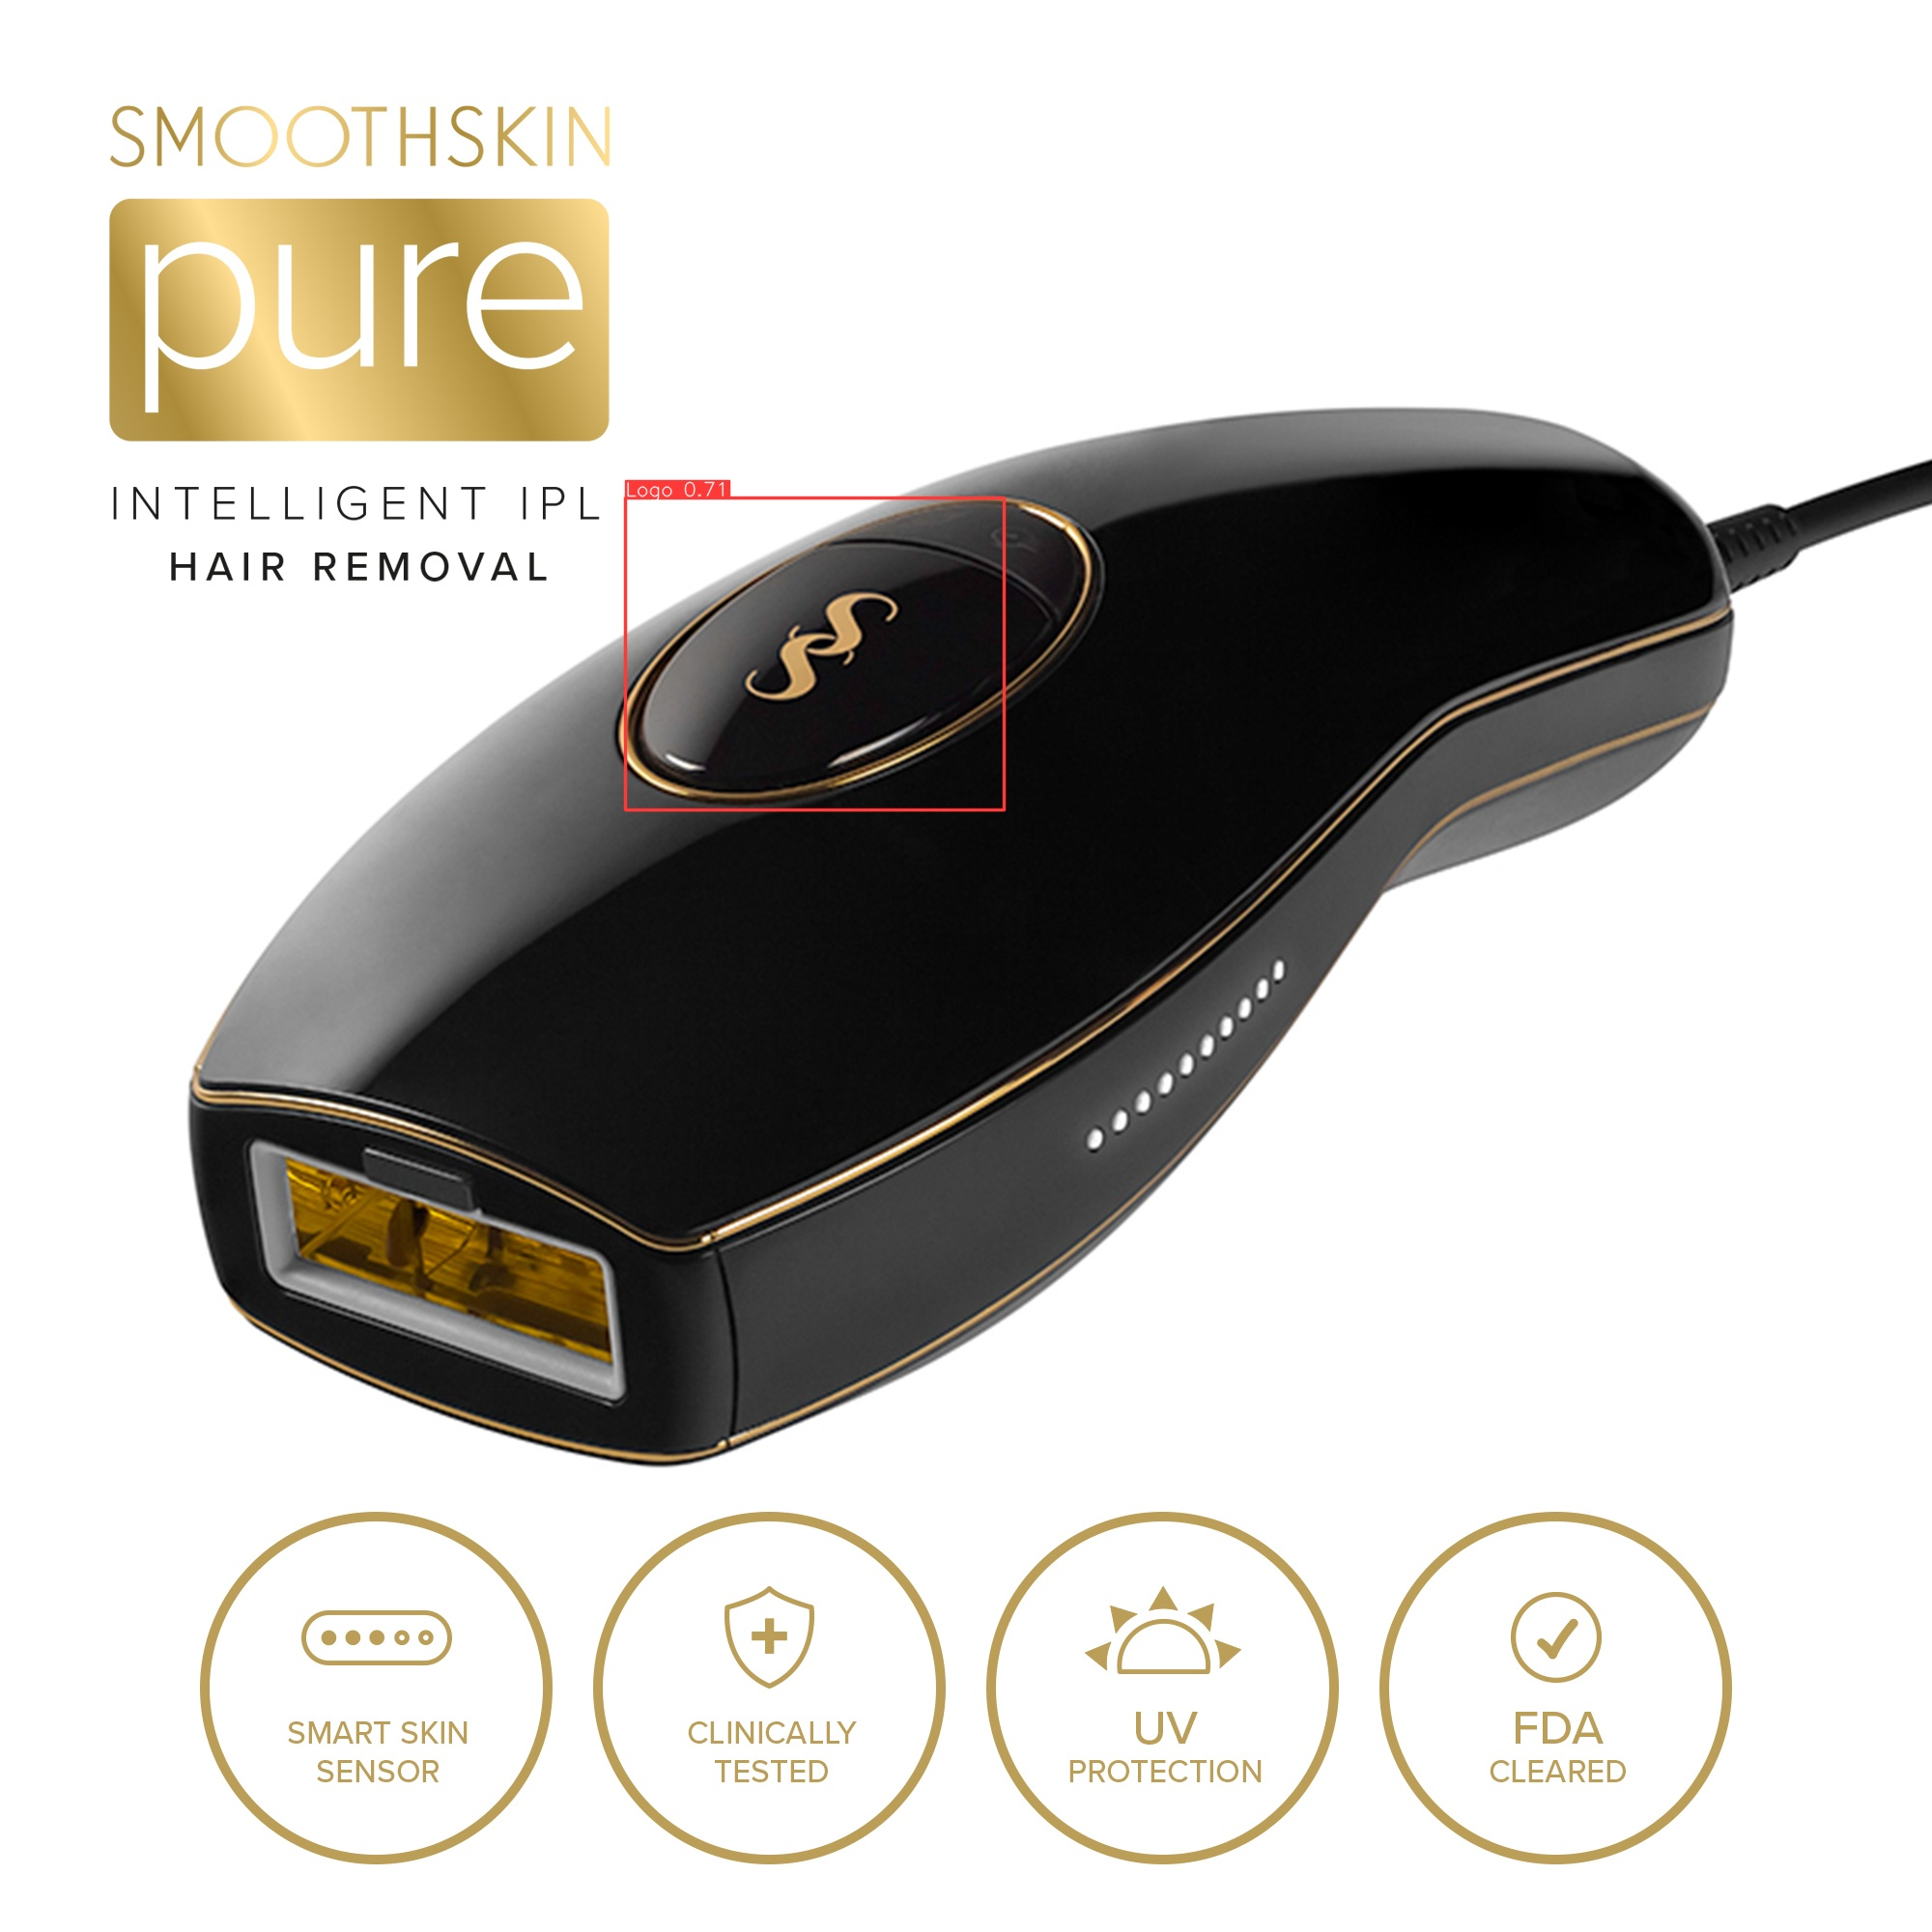

In [9]:
from IPython.display import Image, clear_output 

Image(filename='/content/data/output/run_image/1.jpg', width=800)

In [10]:
# image 파일 inference 
!cd /content/yolov3;python detect.py --source /content/yoloss/images/train/2.jpg \
                            --weights /mydrive/ultra_workdir/yoloss/weights/best.pt --conf 0.3 \
                            --project=/content/data/output --name=run_image --exist-ok --line-thickness 3

detect: weights=['/mydrive/ultra_workdir/yoloss/weights/best.pt'], source=/content/yoloss/images/train/2.jpg, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/data/output, name=run_image, exist_ok=True, line_thickness=2, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-3-gb870de5 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 261 layers, 61497430 parameters, 0 gradients, 154.7 GFLOPs
image 1/1 /content/yoloss/images/train/2.jpg: 640x640 1 Logo, Done. (0.157s)
Speed: 0.6ms pre-process, 156.6ms inference, 2.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to /content/data/output/run_image


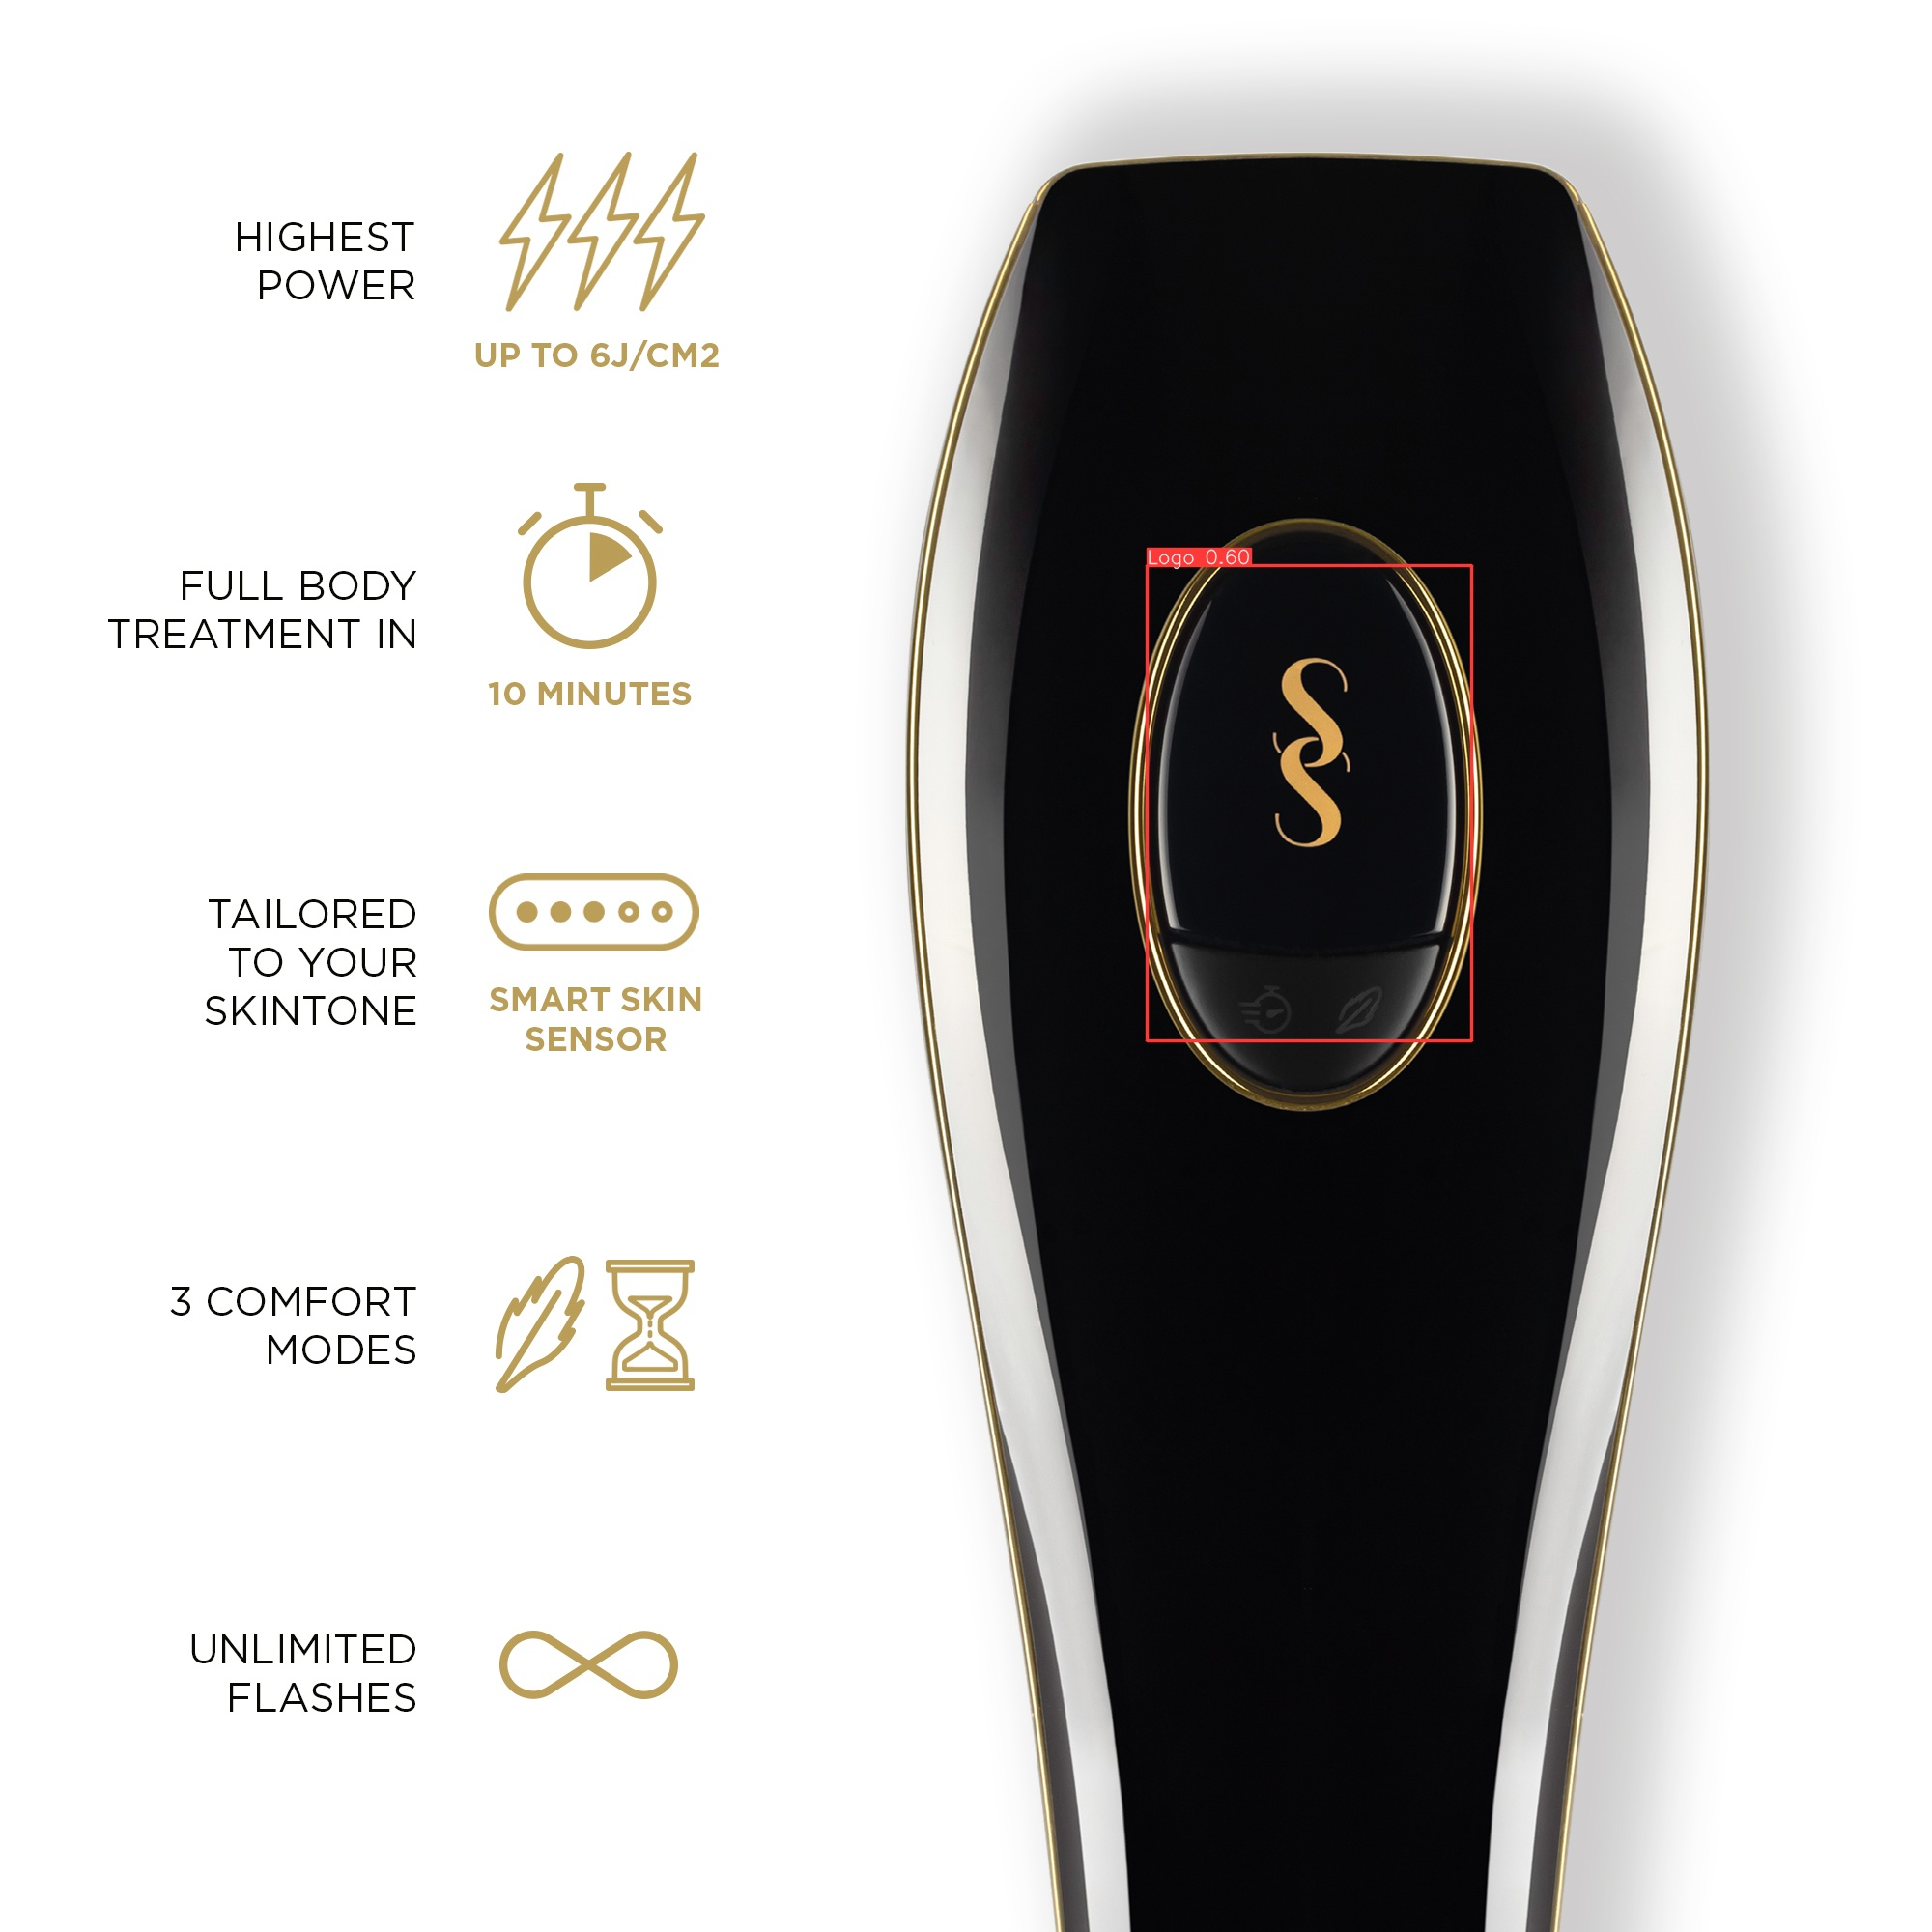

In [11]:

from IPython.display import Image, clear_output 

Image(filename='/content/data/output/run_image/2.jpg', width=800)

In [12]:
 # image 파일 inference 
!cd /content/yolov3;python detect.py --source /content/yoloss/images/train/3.jpg \
                            --weights /mydrive/ultra_workdir/yoloss/weights/best.pt --conf 0.3 \
                            --project=/content/data/output --name=run_image --exist-ok --line-thickness 3


detect: weights=['/mydrive/ultra_workdir/yoloss/weights/best.pt'], source=/content/yoloss/images/train/3.jpg, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/data/output, name=run_image, exist_ok=True, line_thickness=2, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-3-gb870de5 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441MiB)

Fusing layers... 
Model Summary: 261 layers, 61497430 parameters, 0 gradients, 154.7 GFLOPs
image 1/1 /content/yoloss/images/train/3.jpg: 640x640 3 Logos, Done. (0.140s)
Speed: 0.6ms pre-process, 139.6ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to /content/data/output/run_image


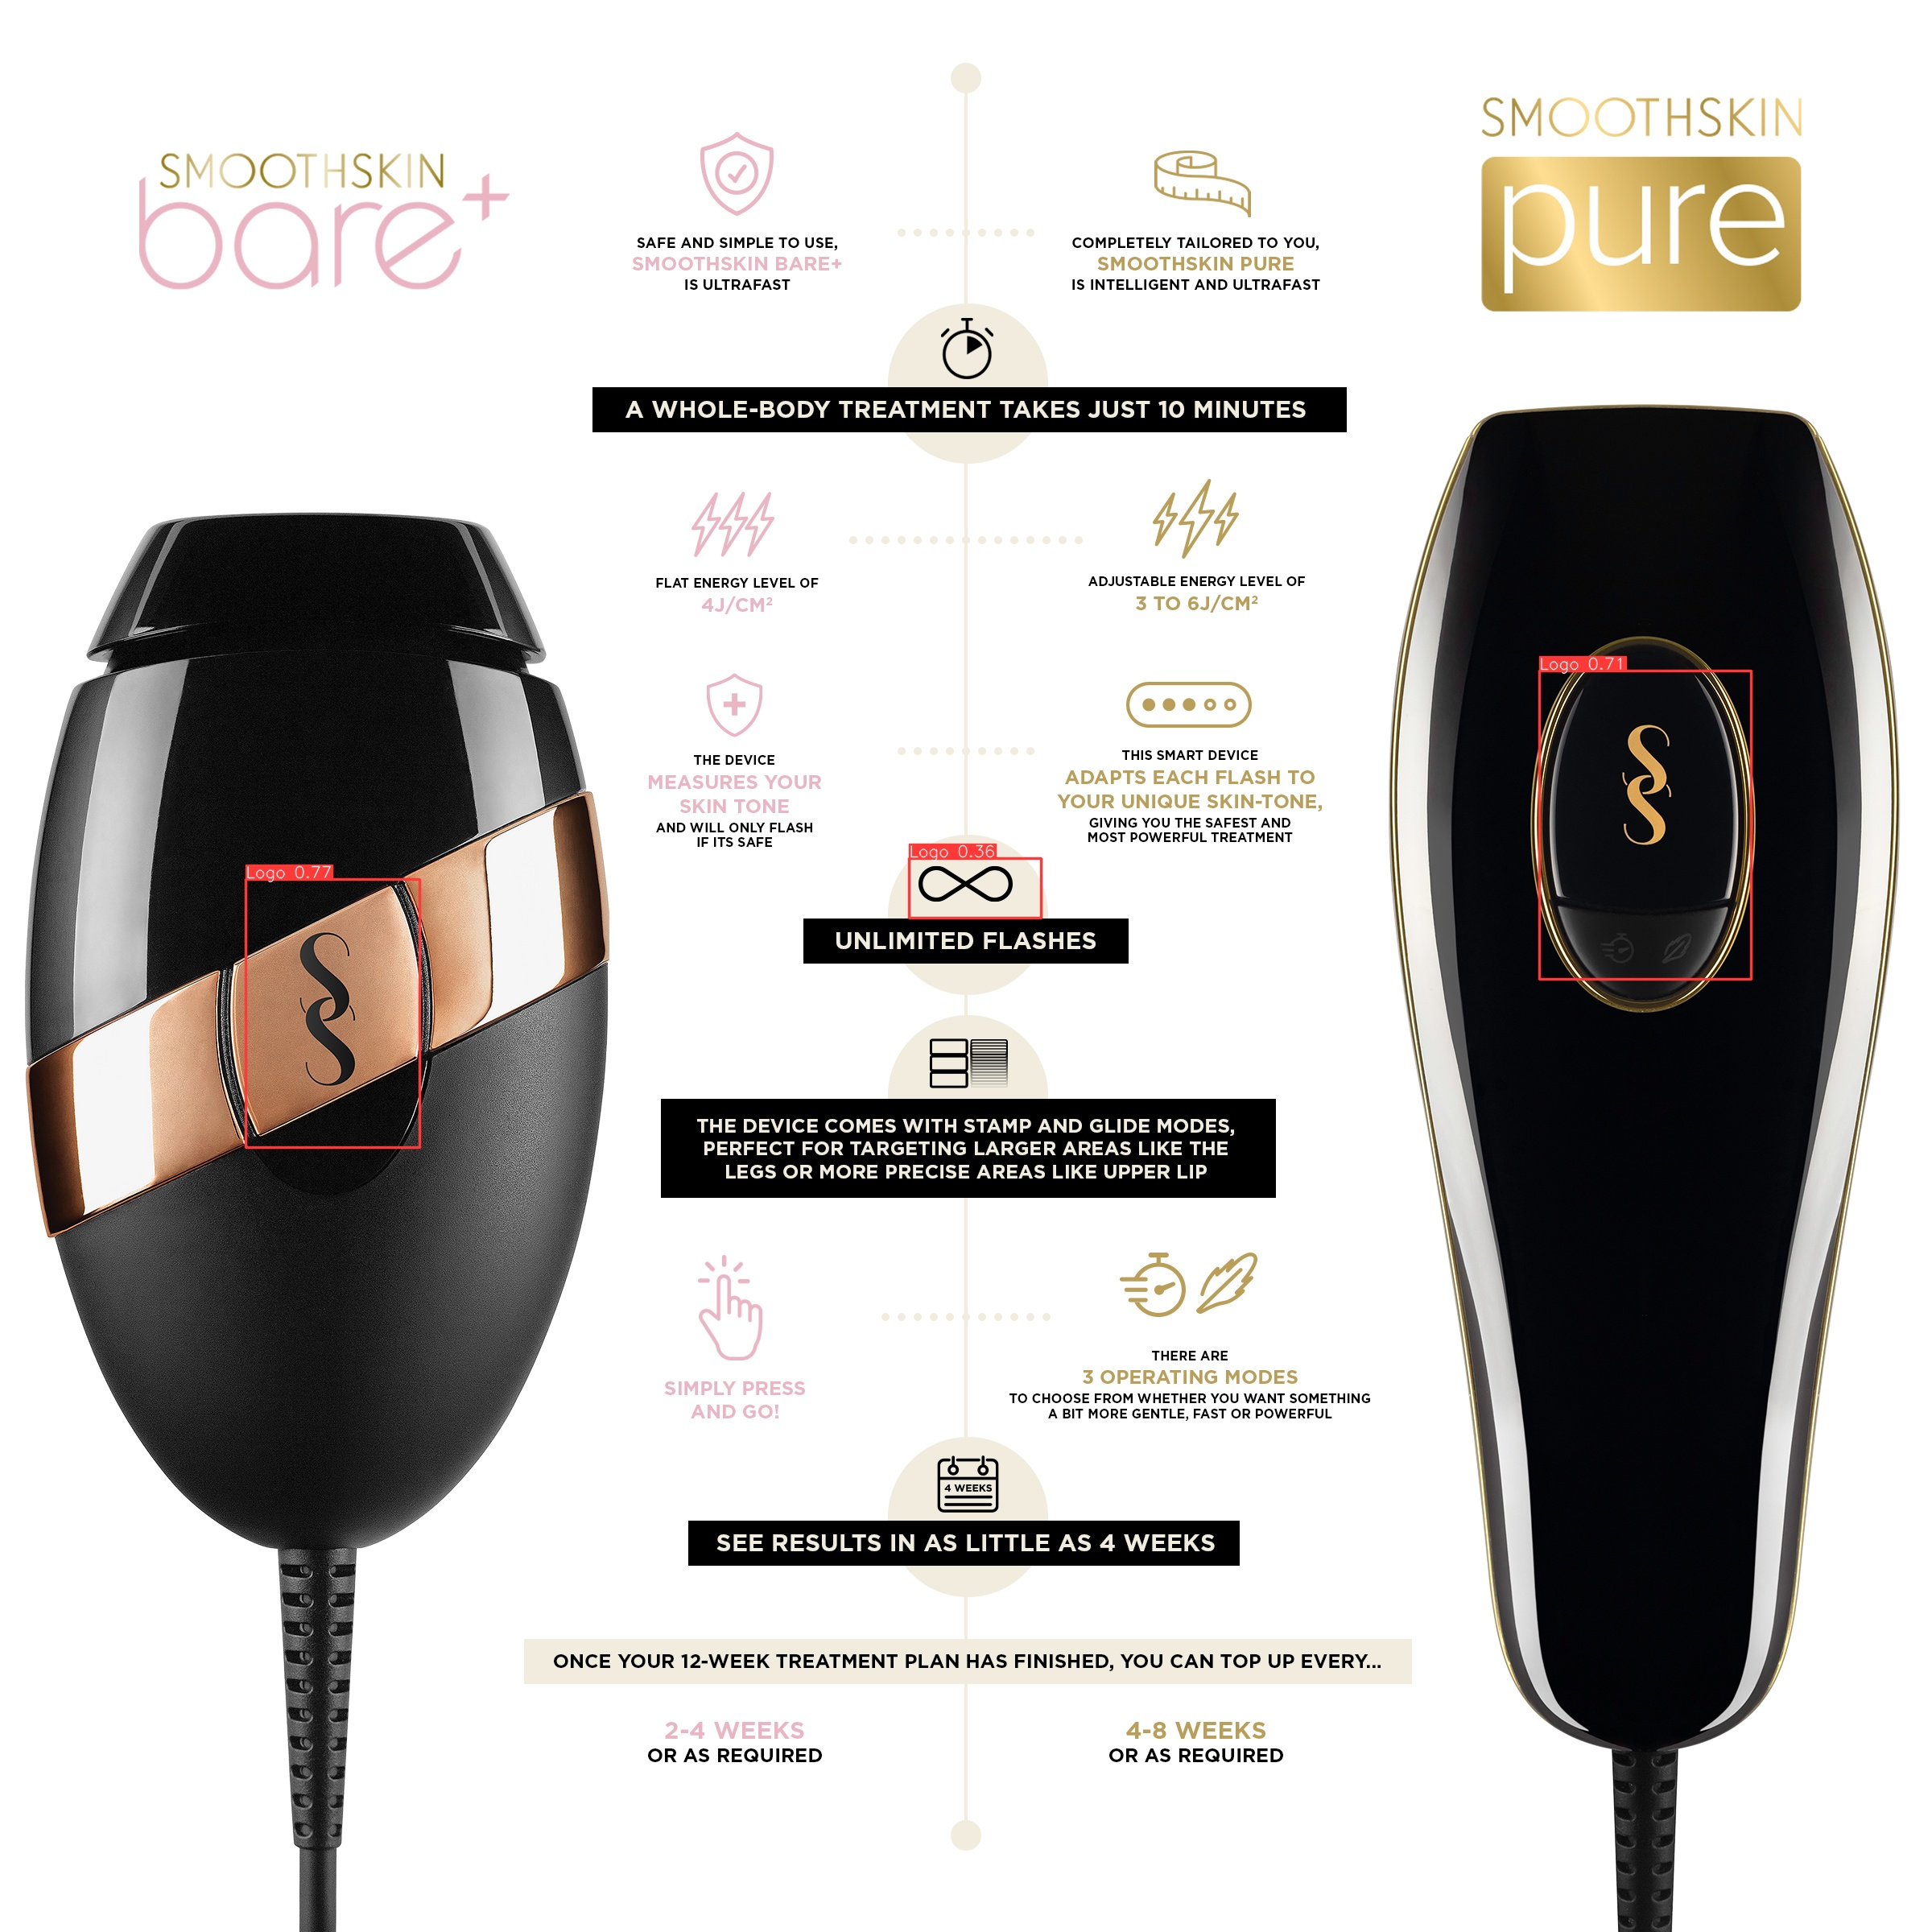

In [13]:

from IPython.display import Image, clear_output 

Image(filename='/content/data/output/run_image/3.jpg', width=800)